# Q1 - A

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


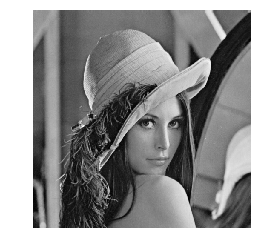

In [15]:
image = cv.imread("lena.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [36]:
def histEqualizer(image):
    dim = image.shape
    image_flat = image.flatten()

    size = dim[0] * dim[1]
    intens, probs = np.unique(image_flat, return_counts=True)
    probs = probs / size
    image_new = np.zeros((size, ))
    for i, pix in enumerate(image_flat):
        intensity_arg = np.where(intens == pix)[0][0] + 1
        new_intensity = np.floor(np.sum(probs[ :intensity_arg]) * 255)
        image_new[i] = new_intensity
    return image_new.reshape((dim[0], dim[1]))


In [37]:
image_new = histEqualizer(image)

# histograms

As you can see, The histogram equalization was succesfully done.

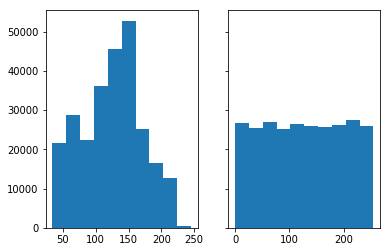

In [38]:
fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].hist(image.ravel())

axs[1].hist(image_new.ravel())

plt.show()

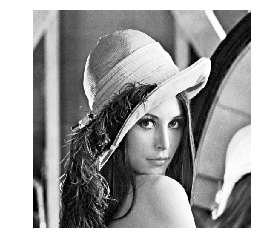

In [39]:
plt.imshow(image_new, cmap="gray")
plt.axis("off")
plt.show()

# Q1 - B

In [73]:

def histMatching(in_image, ref_image):
    dim_image = in_image.shape
    dim_ref = ref_image.shape

    size_image = dim_image[0] * dim_image[1]
    size_ref = dim_ref[0] * dim_ref[1]

    image_flat = in_image.flatten()
    ref_flat = ref_image.flatten()

    image_new = np.zeros((size_image, ))

    intens_image, probs_image = np.unique(image_flat, return_counts=True)
    intens_ref, probs_ref = np.unique(ref_flat, return_counts=True)

    probs_image = probs_image /size_image
    probs_ref = probs_ref / size_ref

    probs_ref = np.cumsum(probs_ref)

    for i, pix in enumerate(image_flat):
        w = np.sum(probs_image[ :np.where(intens_image == pix)[0][0] + 1])
        n = np.where(probs_ref >= w)[0][0]
        image_new[i] = n
        if i % 100 == 0:
            print(i)

    return image_new.reshape(dim_image[0], dim_image[1])

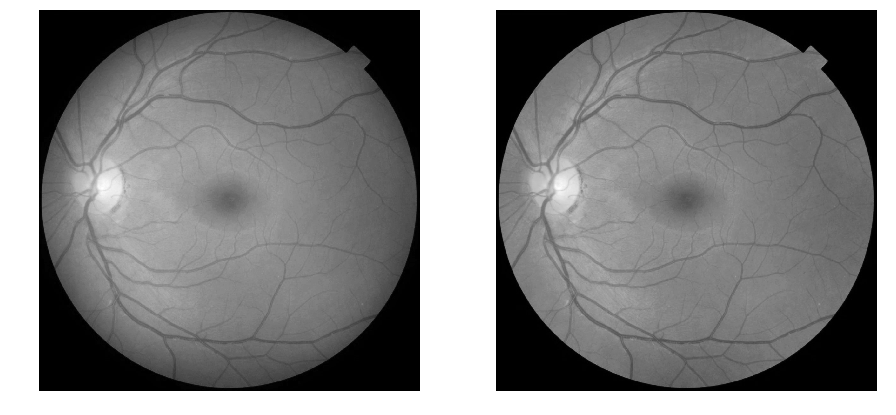

In [97]:
image = cv.imread("eye.png", cv.IMREAD_GRAYSCALE)
ref = cv.imread("eyeref.png", cv.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].axis("off")
axs[1].axis("off")
axs[0].imshow(image, cmap="gray")
axs[1].imshow(ref, cmap="gray")
plt.show()



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300
147400
147500
147600
147700
147800
147900
148000
148100
148200
148300
148400
148500
148600
148700
148800
148900
149000
149100
149200
149300
149400
149500
149600
149700
149800
149900
150000
150100
150200
150300
150400
150500
150600
150700
150800
150900
151000
151100
151200
151300
151400
151500
151600
151700
151800
151900
152000
152100
152200
152300
152400
152500

258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500
264600
264700
264800
264900
265000
265100
265200
265300
265400
265500
265600
265700
265800
265900
266000
266100
266200
266300
266400
266500
266600
266700
266800
266900
267000
267100
267200
267300
267400
267500
267600
267700
267800
267900
268000
268100
268200
268300
268400
268500
268600
268700
268800
268900
269000
269100
269200
269300
269400
269500
269600
269700
269800
269900
270000
270100
270200
270300
270400
270500
270600
270700
270800
270900
271000
271100
271200
271300
271400
271500
271600
271700
271800
271900
272000
272100
272200
272300
272400
272500
272600
272700
272800

388400
388500
388600
388700
388800
388900
389000
389100
389200
389300
389400
389500
389600
389700
389800
389900
390000
390100
390200
390300
390400
390500
390600
390700
390800
390900
391000
391100
391200
391300
391400
391500
391600
391700
391800
391900
392000
392100
392200
392300
392400
392500
392600
392700
392800
392900
393000
393100
393200
393300
393400
393500
393600
393700
393800
393900
394000
394100
394200
394300
394400
394500
394600
394700
394800
394900
395000
395100
395200
395300
395400
395500
395600
395700
395800
395900
396000
396100
396200
396300
396400
396500
396600
396700
396800
396900
397000
397100
397200
397300
397400
397500
397600
397700
397800
397900
398000
398100
398200
398300
398400
398500
398600
398700
398800
398900
399000
399100
399200
399300
399400
399500
399600
399700
399800
399900
400000
400100
400200
400300
400400
400500
400600
400700
400800
400900
401000
401100
401200
401300
401400
401500
401600
401700
401800
401900
402000
402100
402200
402300
402400
402500
402600

505800
505900
506000
506100
506200
506300
506400
506500
506600
506700
506800
506900
507000
507100
507200
507300
507400
507500
507600
507700
507800
507900
508000
508100
508200
508300
508400
508500
508600
508700
508800
508900
509000
509100
509200
509300
509400
509500
509600
509700
509800
509900
510000
510100
510200
510300
510400
510500
510600
510700
510800
510900
511000
511100
511200
511300
511400
511500
511600
511700
511800
511900
512000
512100
512200
512300
512400
512500
512600
512700
512800
512900
513000
513100
513200
513300
513400
513500
513600
513700
513800
513900
514000
514100
514200
514300
514400
514500
514600
514700
514800
514900
515000
515100
515200
515300
515400
515500
515600
515700
515800
515900
516000
516100
516200
516300
516400
516500
516600
516700
516800
516900
517000
517100
517200
517300
517400
517500
517600
517700
517800
517900
518000
518100
518200
518300
518400
518500
518600
518700
518800
518900
519000
519100
519200
519300
519400
519500
519600
519700
519800
519900
520000

627400
627500
627600
627700
627800
627900
628000
628100
628200
628300
628400
628500
628600
628700
628800
628900
629000
629100
629200
629300
629400
629500
629600
629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900
638000
638100
638200
638300
638400
638500
638600
638700
638800
638900
639000
639100
639200
639300
639400
639500
639600
639700
639800
639900
640000
640100
640200
640300
640400
640500
640600
640700
640800
640900
641000
641100
641200
641300
641400
641500
641600

748600
748700
748800
748900
749000
749100
749200
749300
749400
749500
749600
749700
749800
749900
750000
750100
750200
750300
750400
750500
750600
750700
750800
750900
751000
751100
751200
751300
751400
751500
751600
751700
751800
751900
752000
752100
752200
752300
752400
752500
752600
752700
752800
752900
753000
753100
753200
753300
753400
753500
753600
753700
753800
753900
754000
754100
754200
754300
754400
754500
754600
754700
754800
754900
755000
755100
755200
755300
755400
755500
755600
755700
755800
755900
756000
756100
756200
756300
756400
756500
756600
756700
756800
756900
757000
757100
757200
757300
757400
757500
757600
757700
757800
757900
758000
758100
758200
758300
758400
758500
758600
758700
758800
758900
759000
759100
759200
759300
759400
759500
759600
759700
759800
759900
760000
760100
760200
760300
760400
760500
760600
760700
760800
760900
761000
761100
761200
761300
761400
761500
761600
761700
761800
761900
762000
762100
762200
762300
762400
762500
762600
762700
762800

875200
875300
875400
875500
875600
875700
875800
875900
876000
876100
876200
876300
876400
876500
876600
876700
876800
876900
877000
877100
877200
877300
877400
877500
877600
877700
877800
877900
878000
878100
878200
878300
878400
878500
878600
878700
878800
878900
879000
879100
879200
879300
879400
879500
879600
879700
879800
879900
880000
880100
880200
880300
880400
880500
880600
880700
880800
880900
881000
881100
881200
881300
881400
881500
881600
881700
881800
881900
882000
882100
882200
882300
882400
882500
882600
882700
882800
882900
883000
883100
883200
883300
883400
883500
883600
883700
883800
883900
884000
884100
884200
884300
884400
884500
884600
884700
884800
884900
885000
885100
885200
885300
885400
885500
885600
885700
885800
885900
886000
886100
886200
886300
886400
886500
886600
886700
886800
886900
887000
887100
887200
887300
887400
887500
887600
887700
887800
887900
888000
888100
888200
888300
888400
888500
888600
888700
888800
888900
889000
889100
889200
889300
889400

1001400
1001500
1001600
1001700
1001800
1001900
1002000
1002100
1002200
1002300
1002400
1002500
1002600
1002700
1002800
1002900
1003000
1003100
1003200
1003300
1003400
1003500
1003600
1003700
1003800
1003900
1004000
1004100
1004200
1004300
1004400
1004500
1004600
1004700
1004800
1004900
1005000
1005100
1005200
1005300
1005400
1005500
1005600
1005700
1005800
1005900
1006000
1006100
1006200
1006300
1006400
1006500
1006600
1006700
1006800
1006900
1007000
1007100
1007200
1007300
1007400
1007500
1007600
1007700
1007800
1007900
1008000
1008100
1008200
1008300
1008400
1008500
1008600
1008700
1008800
1008900
1009000
1009100
1009200
1009300
1009400
1009500
1009600
1009700
1009800
1009900
1010000
1010100
1010200
1010300
1010400
1010500
1010600
1010700
1010800
1010900
1011000
1011100
1011200
1011300
1011400
1011500
1011600
1011700
1011800
1011900
1012000
1012100
1012200
1012300
1012400
1012500
1012600
1012700
1012800
1012900
1013000
1013100
1013200
1013300
1013400
1013500
1013600
1013700
1013800


1114100
1114200
1114300
1114400
1114500
1114600
1114700
1114800
1114900
1115000
1115100
1115200
1115300
1115400
1115500
1115600
1115700
1115800
1115900
1116000
1116100
1116200
1116300
1116400
1116500
1116600
1116700
1116800
1116900
1117000
1117100
1117200
1117300
1117400
1117500
1117600
1117700
1117800
1117900
1118000
1118100
1118200
1118300
1118400
1118500
1118600
1118700
1118800
1118900
1119000
1119100
1119200
1119300
1119400
1119500
1119600
1119700
1119800
1119900
1120000
1120100
1120200
1120300
1120400
1120500
1120600
1120700
1120800
1120900
1121000
1121100
1121200
1121300
1121400
1121500
1121600
1121700
1121800
1121900
1122000
1122100
1122200
1122300
1122400
1122500
1122600
1122700
1122800
1122900
1123000
1123100
1123200
1123300
1123400
1123500
1123600
1123700
1123800
1123900
1124000
1124100
1124200
1124300
1124400
1124500
1124600
1124700
1124800
1124900
1125000
1125100
1125200
1125300
1125400
1125500
1125600
1125700
1125800
1125900
1126000
1126100
1126200
1126300
1126400
1126500


1220600
1220700
1220800
1220900
1221000
1221100
1221200
1221300
1221400
1221500
1221600
1221700
1221800
1221900
1222000
1222100
1222200
1222300
1222400
1222500
1222600
1222700
1222800
1222900
1223000
1223100
1223200
1223300
1223400
1223500
1223600
1223700
1223800
1223900
1224000
1224100
1224200
1224300
1224400
1224500
1224600
1224700
1224800
1224900
1225000
1225100
1225200
1225300
1225400
1225500
1225600
1225700
1225800
1225900
1226000
1226100
1226200
1226300
1226400
1226500
1226600
1226700
1226800
1226900
1227000
1227100
1227200
1227300
1227400
1227500
1227600
1227700
1227800
1227900
1228000
1228100
1228200
1228300
1228400
1228500
1228600
1228700
1228800
1228900
1229000
1229100
1229200
1229300
1229400
1229500
1229600
1229700
1229800
1229900
1230000
1230100
1230200
1230300
1230400
1230500
1230600
1230700
1230800
1230900
1231000
1231100
1231200
1231300
1231400
1231500
1231600
1231700
1231800
1231900
1232000
1232100
1232200
1232300
1232400
1232500
1232600
1232700
1232800
1232900
1233000


1333000
1333100
1333200
1333300
1333400
1333500
1333600
1333700
1333800
1333900
1334000
1334100
1334200
1334300
1334400
1334500
1334600
1334700
1334800
1334900
1335000
1335100
1335200
1335300
1335400
1335500
1335600
1335700
1335800
1335900
1336000
1336100
1336200
1336300
1336400
1336500
1336600
1336700
1336800
1336900
1337000
1337100
1337200
1337300
1337400
1337500
1337600
1337700
1337800
1337900
1338000
1338100
1338200
1338300
1338400
1338500
1338600
1338700
1338800
1338900
1339000
1339100
1339200
1339300
1339400
1339500
1339600
1339700
1339800
1339900
1340000
1340100
1340200
1340300
1340400
1340500
1340600
1340700
1340800
1340900
1341000
1341100
1341200
1341300
1341400
1341500
1341600
1341700
1341800
1341900
1342000
1342100
1342200
1342300
1342400
1342500
1342600
1342700
1342800
1342900
1343000
1343100
1343200
1343300
1343400
1343500
1343600
1343700
1343800
1343900
1344000
1344100
1344200
1344300
1344400
1344500
1344600
1344700
1344800
1344900
1345000
1345100
1345200
1345300
1345400


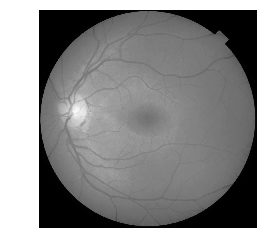

In [92]:
image_new =  histMatching(image, ref)



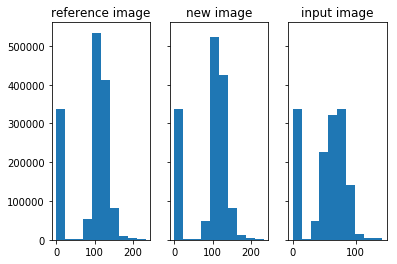

In [83]:
fig, axs = plt.subplots(1, 3, sharey=True)

axs[0].hist(ref.ravel())
axs[0].set_title('reference image')
axs[1].hist(image_new.ravel())
axs[1].set_title('new image')
axs[2].hist(image.ravel())
axs[2].set_title('input image')

plt.show()

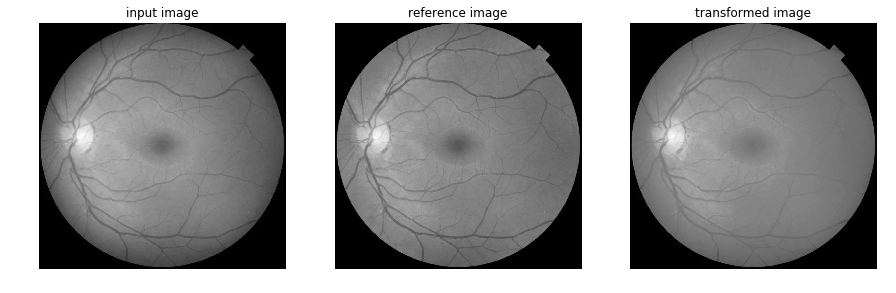

In [96]:
fig, axs = plt.subplots(1, 3, figsize = (15,15))
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title('input image')
axs[1].set_title('reference image')
axs[2].set_title('transformed image')
axs[0].imshow(image, cmap="gray")
axs[1].imshow(ref, cmap="gray")
axs[2].imshow(image_new, cmap="gray")
plt.show()